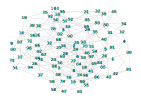

In [1]:
using LightGraphs
using GraphPlot
using Random

# N = 100
# K = 5

# G1 = random_regular_graph(N, K)

# gplot(G1, nodelabel=1:N)


In [18]:
using StatsBase
using LightGraphs
using GraphPlot
using Random

function nearestNeighborsExclusive(G,i)
    ns = neighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in neighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end
    
            
# println(nearestNeighborsExclusive(G1,6))
    

function findPrefTarget(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    else
#         println("In findPrefTarget with length $(length(nnes))")
        newAttach = sample(nnes, AnalyticWeights([agentScores[i] for i in nnes]))
        return newAttach
    end
end
# println(neighbors(G1, 1))
function prefAttach(G,i,agentScores)
    
    new = findPrefTarget(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = rand(neighbors(G,i),1)[1]
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end
    
# prefAttach(G1,1)
# println(neighbors(G1,1))
    

prefAttach (generic function with 2 methods)

In [19]:
using StatsBase
using LightGraphs
using GraphPlot
using Random

function nearestNeighborsExclusive(G,i)
    ns = neighbors(G, i)
    seconds = Set()
    
    for j in ns
        for k in neighbors(G,j)
            push!(seconds, k)
        end
    end
    toSubtract = Set(vcat(ns, [i]))
    return collect(setdiff(seconds, toSubtract))
end
    
            
# println(nearestNeighborsExclusive(G1,6))
    

function findPrefTarget(G,i,agentScores)
    nnes = nearestNeighborsExclusive(G,i)
    if length(nnes) == 0
        return 0
    else
#         println("In findPrefTarget with length $(length(nnes))")
        newAttach = sample(nnes, AnalyticWeights([agentScores[i] for i in nnes]))
        return newAttach
    end
end
# println(neighbors(G1, 1))
function prefAttach(G,i,agentScores)
    
    new = findPrefTarget(G,i,agentScores)
    if new == 0
        return
    end
    
    toSubtract = sample(neighbors(G,i), AnalyticWeights([1-agentScores[j] for j in neighbors(G,i)]))
    result = rem_edge!(G, i, toSubtract)
    if !result
        println("Problem here sir")
        exit()
    end
    add_edge!(G,i,new)
end

prefAttach (generic function with 2 methods)

In [30]:
using Plots
myplot = Nothing
for K in [10]
    N = 2000
#     K = 5
    numRounds = 20000

    G1 = random_regular_graph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach(G1,activeNode, agentScores)
    #     println("$n complete")
    end
#     myplot = plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
    pairs = Iterators.flatten([[(agentScores[i],agentScores[j]) for j in neighbors(G1,i)] for i in 1:N])
    myplot = plot([pair[1] for pair in pairs], [pair[2] for pair in pairs], seriestype=:scatter)
end
plot(myplot)

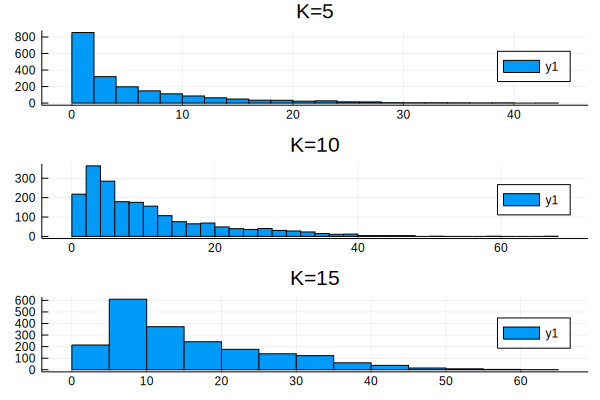

In [23]:
using Plots
p5= Nothing
p10= Nothing
p15 = Nothing
for K in [5,10,15]
    N = 2000
#     K = 5
    numRounds = 20000

    G1 = random_regular_graph(N, K)
    agentScores = rand(N)

    # gplot(G1, nodelabel=1:N)
    for n in 1:numRounds
        activeNode = rand(1:N,1)[1]
        prefAttach(G1,activeNode, agentScores)
    #     println("$n complete")
    end
    if K == 5
        p5 = histogram([length(neighbors(G1,i)) for i in 1:N], title = "K=5")
    elseif  K == 10
        p10 = histogram([length(neighbors(G1,i)) for i in 1:N], title = "K=10")
    else
        p15 = histogram([length(neighbors(G1,i)) for i in 1:N], title="K=15")
    end
end
plot(p5,p10,p15, layout=(3,1))


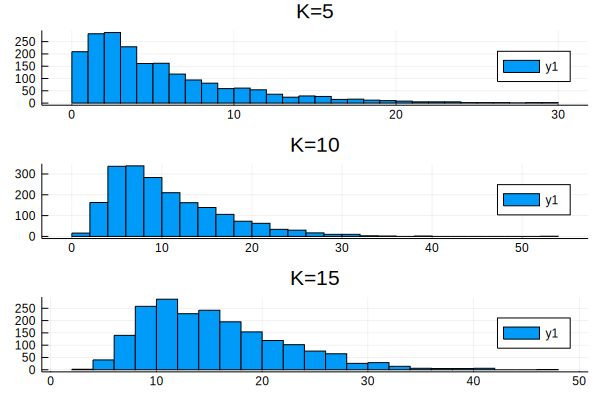

In [10]:
plot(p5,p10,p15, layout=(3,1))

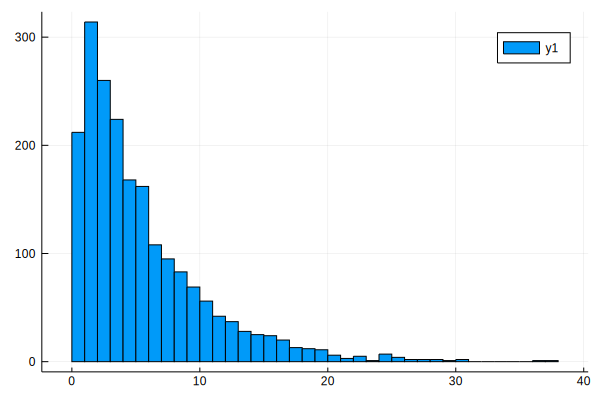

In [41]:
using Plots
plot(agentScores, [length(neighbors(G1,i)) for i in 1:N], seriestype=:scatter)
histogram([length(neighbors(G1,i)) for i in 1:N])

In [29]:
chain([[1,2],[3,4]])

UndefVarError: UndefVarError: chain not defined